In [1]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
Требуется выполнить следующее задание:

<h3>Задание</h3>

1. Загрузите файл HR.csv в pandas dataframe
2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.
4. Рассчитайте сколько сотрудников работает в каждом департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
    - Доля сотрудников с повышением за последние 5 лет
    - Средняя степень удовлетворенности
    - Среднее количество проектов
9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки
10. Загрузить jupyter notebook с решение на github и прислать ссылку 5



Загрузите файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Нет пропущенных значений

<h3>Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).</h3>

In [4]:
for i in df.select_dtypes(include=[int, float]).columns:
    print('Среднее значение переменной', i, '-', round(df[i].mean(), 3))
    print('Медианное значение переменной', i, '-', round(df[i].median(), 3))
    print('Мода переменной', i, '-', round(df[i].mode()[0], 3))
    print('Максимальное значение переменной', i, '-', round(min(df[i]), 3))
    print('Минимальное значение переменной', i, '-', round(max(df[i]), 3))
    print('Стандартное отклонение переменной', i, '-', round(st.stdev(df[i]), 3))
    print()

Среднее значение переменной satisfaction_level - 0.613
Медианное значение переменной satisfaction_level - 0.64
Мода переменной satisfaction_level - 0.1
Максимальное значение переменной satisfaction_level - 0.09
Минимальное значение переменной satisfaction_level - 1.0
Стандартное отклонение переменной satisfaction_level - 0.249

Среднее значение переменной last_evaluation - 0.716
Медианное значение переменной last_evaluation - 0.72
Мода переменной last_evaluation - 0.55
Максимальное значение переменной last_evaluation - 0.36
Минимальное значение переменной last_evaluation - 1.0
Стандартное отклонение переменной last_evaluation - 0.171

Среднее значение переменной number_project - 3.803
Медианное значение переменной number_project - 4.0
Мода переменной number_project - 4
Максимальное значение переменной number_project - 2
Минимальное значение переменной number_project - 7
Стандартное отклонение переменной number_project - 1.233

Среднее значение переменной average_montly_hours - 201.05
М

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<h3>Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.</h3>

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Text(0.5, 1.0, 'Распределение time_spend_company')

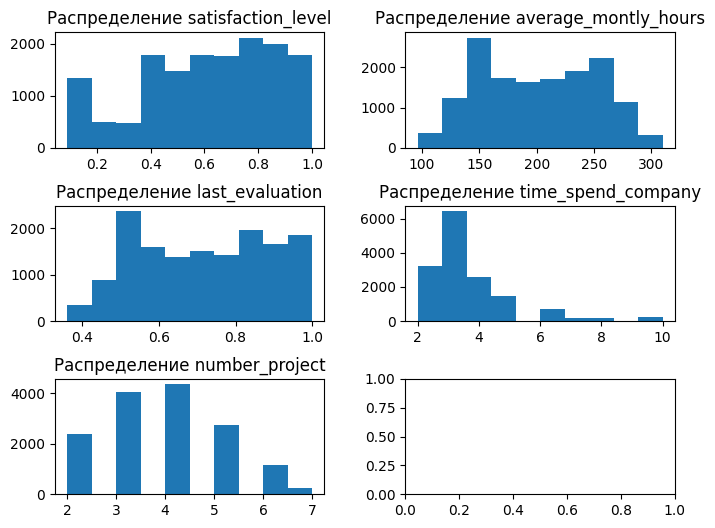

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax[0, 0].hist(df['satisfaction_level'])
ax[0, 0].set_title('Распределение satisfaction_level')

ax[1, 0].hist(df['last_evaluation'])
ax[1, 0].set_title('Распределение last_evaluation')

ax[2, 0].hist(df['number_project'])
ax[2, 0].set_title('Распределение number_project')

ax[0, 1].hist(df['average_montly_hours'])
ax[0, 1].set_title('Распределение average_montly_hours')

ax[1, 1].hist(df['time_spend_company'])
ax[1, 1].set_title('Распределение time_spend_company')

Мы видим, что распределения данных не везде нормальные, тогда будем использовать коэффициент корреляции Спирмена

In [8]:
df.iloc[:, :5].corr('spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


In [9]:
corr_df = df[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

<Axes: >

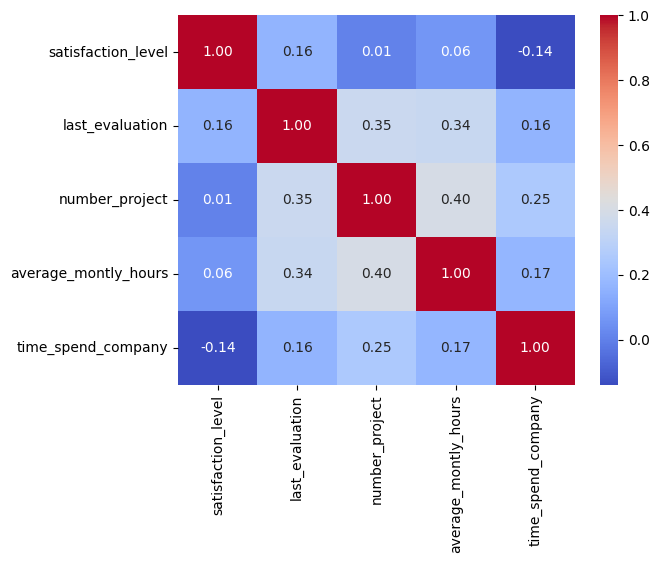

In [10]:
sns.heatmap(df.iloc[:, :5].corr('spearman'), annot=True, cmap='coolwarm', fmt=".2f")

In [11]:
corr_pairs = df.iloc[:, :5].corr('spearman').unstack()
corr_pairs = corr_pairs[corr_pairs != 1].drop_duplicates().reset_index()
corr_pairs_value = max(corr_pairs[0])
min_corr_pairs_value = min(corr_pairs[0])
corr_pairs

,level_0,level_1,0
0,satisfaction_level,last_evaluation,0.162407
1,satisfaction_level,number_project,0.005786
2,satisfaction_level,average_montly_hours,0.062000
3,satisfaction_level,time_spend_company,-0.139428
4,last_evaluation,number_project,0.350399
5,last_evaluation,average_montly_hours,0.342061
6,last_evaluation,time_spend_company,0.161154
7,number_project,average_montly_hours,0.397855
8,number_project,time_spend_company,0.251971
9,average_montly_hours,time_spend_company,0.168750


In [12]:

print('Пара самых коррелируемых переменных')
print(corr_pairs[corr_pairs[0] == corr_pairs_value]['level_1'].values[0])

print(corr_pairs[corr_pairs[0] == corr_pairs_value]['level_0'].values[0])
print()

print('Пара наимение коррелируемых переменных')

print(corr_pairs[corr_pairs[0] == min_corr_pairs_value]['level_1'].values[0])

print(corr_pairs[corr_pairs[0] == min_corr_pairs_value]['level_0'].values[0])

Пара самых коррелируемых переменных
average_montly_hours
number_project

Пара наимение коррелируемых переменных
time_spend_company
satisfaction_level


<h3>Рассчитайте сколько сотрудников работает в каждом департаменте.</h3>

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
empl_count = pd.DataFrame(df.groupby('department').count()['satisfaction_level'])
empl_count.index.name = 'Сколько сотрудников работает в каждом департаменте'

empl_count

,satisfaction_level
Сколько сотрудников работает в каждом департаменте,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


<h3>Показать распределение сотрудников по зарплатам.</h3>

In [15]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

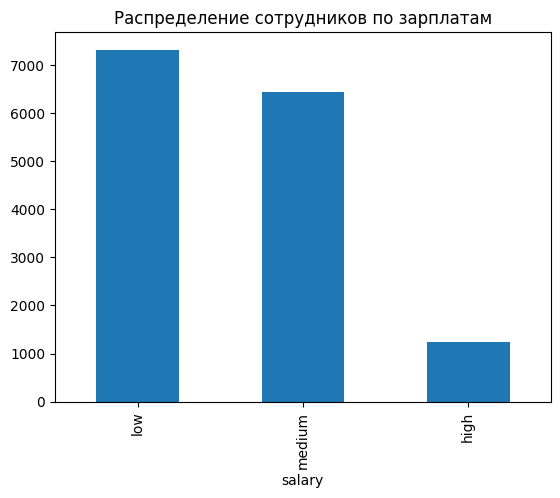

In [16]:
df['salary'].value_counts().plot(kind='bar')
plt.title('Распределение сотрудников по зарплатам')

<h3>Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности</h3>

In [17]:
salaries = pd.DataFrame(df.groupby('department')['salary'].value_counts())

salaries = salaries.reset_index()
salaries.head()

,department,salary,count
0,IT,low,609
1,IT,medium,535
2,IT,high,83
3,RandD,medium,372
4,RandD,low,364


In [18]:
salaries['department'].unique()

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

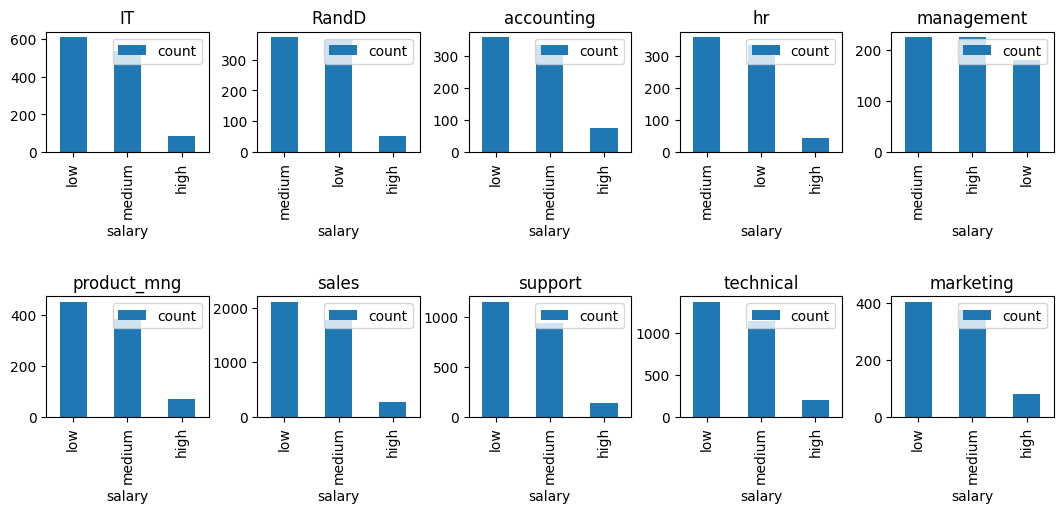

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(13, 5))
fig.subplots_adjust(hspace=1.2, wspace=0.3)

for index, dep in enumerate(salaries['department'].unique()):
    if index < 5:
        salaries[salaries['department'] == dep].plot(x='salary', y='count', kind='bar', ax=ax[0, index])
        ax[0, index].set_title(dep)
    elif index >= 5:
        salaries[salaries['department'] == dep].plot(x='salary', y='count', kind='bar', ax=ax[1, index - 6])
        ax[1, index - 6].set_title(dep)


<h3>Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом</h3>

In [20]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


Для проверки гипотезы будем использовать A/B тестирование.
Первое нам нужно проверить распределение данных, является ли оно нормальным

H0 (нулевая гипотеза): Среднее время, проведенное на работе сотрудниками с высоким окладом, не отличается от среднего времени сотрудников с низким окладом.

H1 (альтернативаня гипотеза): Среднее время, проведенное на работе сотрудниками с высоким окладом, отличается от среднего времени сотрудников с низким окладом.

<BarContainer object of 3 artists>

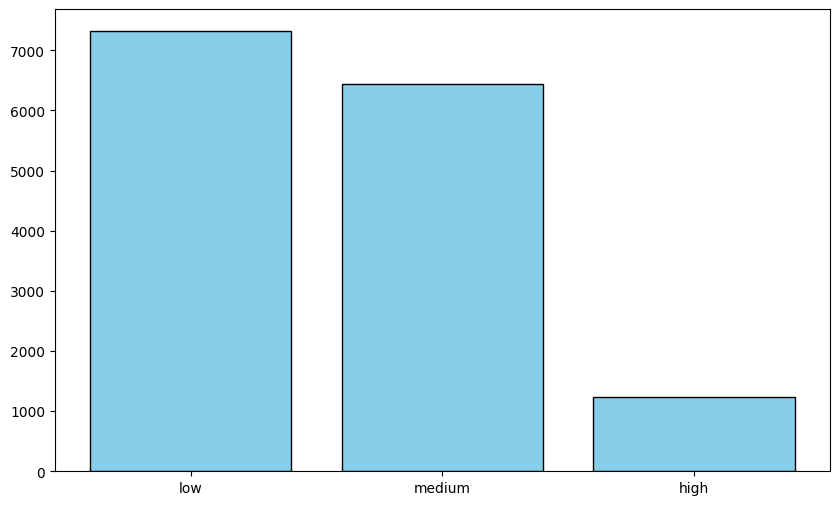

In [21]:
salary_counts = df['salary'].value_counts()

plt.figure(figsize=(10, 6))

plt.bar(salary_counts.index, salary_counts.values, color='skyblue', edgecolor='black')

Text(0.5, 0, 'Часов в месяц')

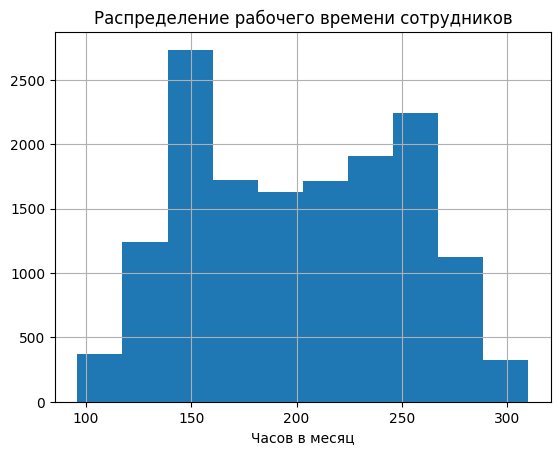

In [22]:
df['average_montly_hours'].hist()
plt.title('Распределение рабочего времени сотрудников')
plt.xlabel('Часов в месяц')

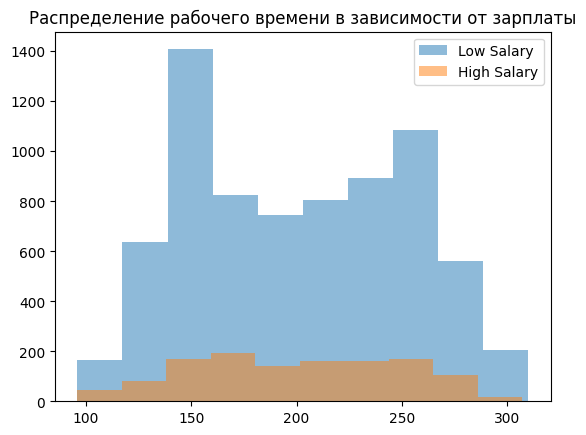

In [23]:
low_salary = df[df['salary'] == 'low']['average_montly_hours']
high_salary = df[df['salary'] == 'high']['average_montly_hours']

plt.hist(low_salary, alpha=0.5, label='Low Salary')
plt.hist(high_salary, alpha=0.5, label='High Salary')
plt.title('Распределение рабочего времени в зависимости от зарплаты')
plt.legend()
plt.show()

In [24]:
stat, p_value = stats.shapiro(df['average_montly_hours'])

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
else:
    print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

Отклоняем нулевую гипотезу >> Данные распределены не нормально


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Тест Шарипо-Уилка не подходит для нашего ДатаФрейма, так как содержит более 5 000 записей. Тогла используем другой метод

In [25]:
from scipy.stats import kstest

kstest(df['average_montly_hours'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=96, statistic_sign=-1)

И график и тест Колмогорова - Смирнова говорит о том, что данные распрделены не нормально.
Тогда будем использовать тест Мана Уитни для проверки гипотезы

In [26]:
alpha = 0.05

low_salary = list(low_salary)
high_salary = list(high_salary)

stat, p_value = stats.mannwhitneyu(low_salary, high_salary)

if p_value < alpha:
    print('Различия статистически значимы, отвергаем нулевую гипотезу')
else:
    print('Различия статистически не значимы, не отвергаем нулевую гипотезу')

Различия статистически не значимы, не отвергаем нулевую гипотезу


Мы не отвергаем нулевую гипотезу, а это значит что **Среднее время, проведенное на работе сотрудниками с высоким окладом, не отличается от среднего времени сотрудников с низким окладом.**

<h3>Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):</h3>

- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [27]:
share_of_employees = len(df[df['promotion_last_5years'] == 1]) / len(df[df['promotion_last_5years'] == 0])

print('Доля Доля сотрудников с повышением за последние 5 лет -', round(share_of_employees, 3))

Доля Доля сотрудников с повышением за последние 5 лет - 0.022


In [28]:
sat_level = df['satisfaction_level'].mean()

print('Средняя степень удовлетворенности -', round(sat_level, 3))

Средняя степень удовлетворенности - 0.613


In [29]:
proj_num = df['number_project'].mean()

print('Среднее количество проектов -', round(proj_num, 3))

Среднее количество проектов - 3.803


<h3>Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки</h3>

In [30]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [31]:
df_2 = df.drop(['department', 'salary'], axis=1)

In [32]:
df_2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [33]:
from sklearn. linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [34]:
x = df_2.drop(['left'], axis=1)
y = df['left']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
len(y)

14999

In [41]:
lg_model=LogisticRegression(max_iter=1000)

lg_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
y_predict = lg_model.predict(x_test)

In [43]:
pd.DataFrame({'y_test':y_test, 'y_predict': y_predict})

,y_test,y_predict
6723,0,0
6473,0,0
4679,0,0
862,1,0
7286,0,0
...,...,...
3297,0,0
14113,0,0
5514,0,0
9939,0,0


In [45]:
from sklearn.metrics import classification_report

In [53]:
report = classification_report(y_test, y_predict, target_names=['Not left', 'left'], output_dict=True)
pd.DataFrame(report)

,Not left,left,accuracy,macro avg,weighted avg
precision,0.794727,0.466667,0.757,0.630697,0.717523
recall,0.919791,0.228045,0.757,0.573918,0.757000
f1-score,0.852698,0.306375,0.757,0.579536,0.724130
support,2294.000000,706.000000,0.757,3000.000000,3000.000000


In [106]:
report

{'Not left': {'precision': 0.7947269303201506,
  'recall': 0.9197907585004359,
  'f1-score': 0.8526975146494241,
  'support': 2294},
 'left': {'precision': 0.4666666666666667,
  'recall': 0.22804532577903683,
  'f1-score': 0.3063748810656518,
  'support': 706},
 'accuracy': 0.757,
 'macro avg': {'precision': 0.6306967984934087,
  'recall': 0.5739180421397364,
  'f1-score': 0.579536197857538,
  'support': 3000},
 'weighted avg': {'precision': 0.7175234149403641,
  'recall': 0.757,
  'f1-score': 0.7241295882127097,
  'support': 3000}}

In [100]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[2110,  184],
       [ 545,  161]])

**Метрика F1 показывает достаточно точные предскзания по неушедшим сотрубникам, но точность предсказания ушедших сотрудников на низком уровне**

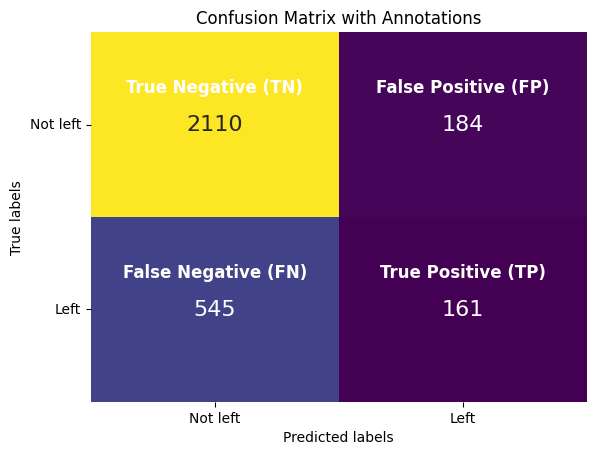

In [101]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False, annot_kws={"size": 16})

# Добавление аннотаций над значениями
labels = [['True Negative (TN)', 'False Positive (FP)'], ['False Negative (FN)', 'True Positive (TP)']]
for i in range(2):
    for j in range(2):
        ax.text(j + 0.5, i + 0.3, labels[i][j], horizontalalignment='center', verticalalignment='center', color='white', fontsize=12, weight='bold')

# Настройка меток осей
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(['Not left', 'Left'])
ax.set_yticklabels(['Not left', 'Left'], rotation=0)

# Название графика
plt.title('Confusion Matrix with Annotations')
plt.show()

<h3>Попробуем использовать дерево решений</h3>

In [91]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
y_tree_pred = tree_model.predict(x_test)

In [96]:
tree_report = classification_report(y_test, y_tree_pred, target_names=['Not left', 'left'], output_dict=True)

cm_tree_report = pd.DataFrame(tree_report)
print(cm_tree_report)

              Not left        left  accuracy    macro avg  weighted avg
precision     0.989854    0.931787  0.975667     0.960821      0.976189
recall        0.978204    0.967422  0.975667     0.972813      0.975667
f1-score      0.983995    0.949270  0.975667     0.966633      0.975823
support    2294.000000  706.000000  0.975667  3000.000000   3000.000000


In [108]:
cm_tree = confusion_matrix(y_test, y_tree_pred)
cm_tree

array([[2244,   50],
       [  23,  683]])

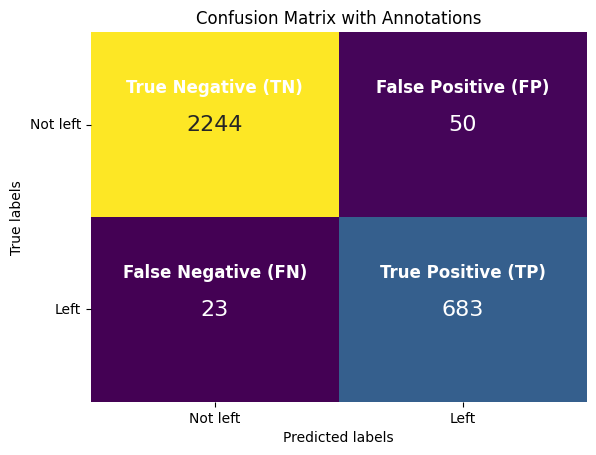

In [110]:
ax = sns.heatmap(cm_tree, annot=True, fmt='d', cmap='viridis', cbar=False, annot_kws={"size": 16})

labels = [['True Negative (TN)', 'False Positive (FP)'], ['False Negative (FN)', 'True Positive (TP)']]
for i in range(2):
    for j in range(2):
        ax.text(j + 0.5, i + 0.3, labels[i][j], horizontalalignment='center', verticalalignment='center', color='white', fontsize=12, weight='bold')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(['Not left', 'Left'])
ax.set_yticklabels(['Not left', 'Left'], rotation=0)

plt.title('Confusion Matrix with Annotations')
plt.show()

**Видим что деревья решений показали результат сильно лучше чем логистическая регрессия**